In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data.txt', sep='\t')  

In [4]:
df["r_BNP"] = df["BNP"].pct_change()
df["r_SG"]  = df["SG"].pct_change()

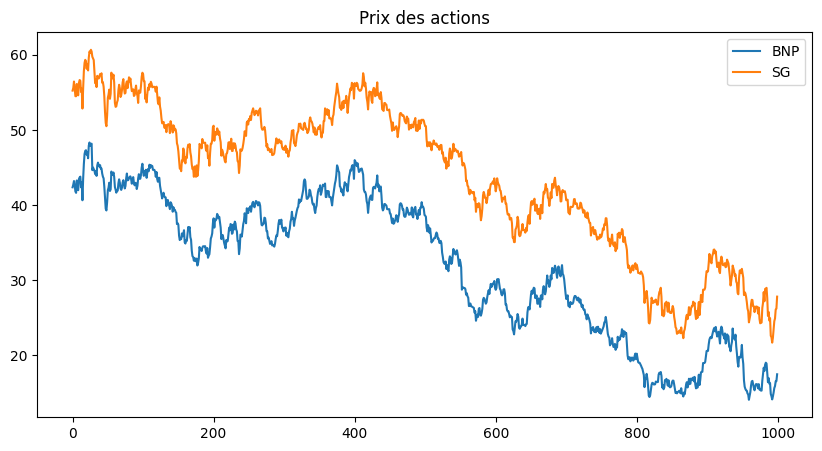

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df['BNP'], label='BNP')
plt.plot(df['SG'], label='SG')
plt.title("Prix des actions")
plt.legend()
plt.show()

In [6]:
df.head()

,BNP,SG,r_BNP,r_SG
0,42.36,55.24,NaN,NaN
1,42.72,55.59,0.008499,0.006336
2,43.20,56.45,0.011236,0.015470
3,42.67,55.55,-0.012269,-0.015943
4,41.81,54.50,-0.020155,-0.018902


In [7]:
df = df.iloc[1:].reset_index(drop=True)

In [8]:
import pandas as pd
import scipy.stats as stats

def univariate_stats(series):
    return {
        "mean": series.mean(),
        "median": series.median(),
        "std": series.std(),
        "min": series.min(),
        "q01": series.quantile(0.01),
        "q05": series.quantile(0.05),
        "q95": series.quantile(0.95),
        "q99": series.quantile(0.99),
        "max": series.max(),
        "skewness": stats.skew(series),
        "kurtosis": stats.kurtosis(series, fisher=False)  # kurtosis classique
    }

stats_BNP = univariate_stats(df["r_BNP"])
stats_SG  = univariate_stats(df["r_SG"])

pd.DataFrame([stats_BNP, stats_SG], index=["BNP", "SG"])


,mean,median,std,min,q01,q05,q95,q99,max,skewness,kurtosis
BNP,-0.000590,-0.000358,0.02434,-0.116199,-0.071999,-0.038691,0.039239,0.061524,0.086786,-0.190459,4.798264
SG,-0.000473,-0.000547,0.02069,-0.093616,-0.051848,-0.032579,0.033202,0.055133,0.079479,-0.055439,4.919822


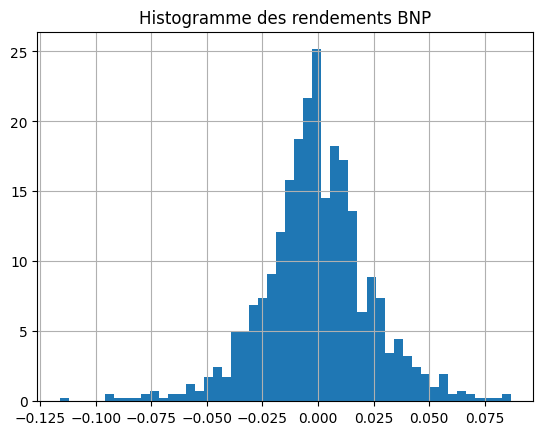

In [9]:
import matplotlib.pyplot as plt
plt.style.use("default")
plt.figure()
df["r_BNP"].hist(bins=50, density=True)
plt.title("Histogramme des rendements BNP")
plt.show()


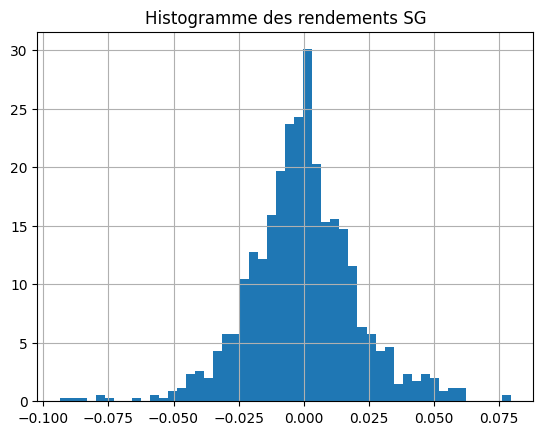

In [10]:
import matplotlib.pyplot as plt
plt.style.use("default")
plt.figure()
df["r_SG"].hist(bins=50, density=True)
plt.title("Histogramme des rendements SG")
plt.show()


<Axes: >

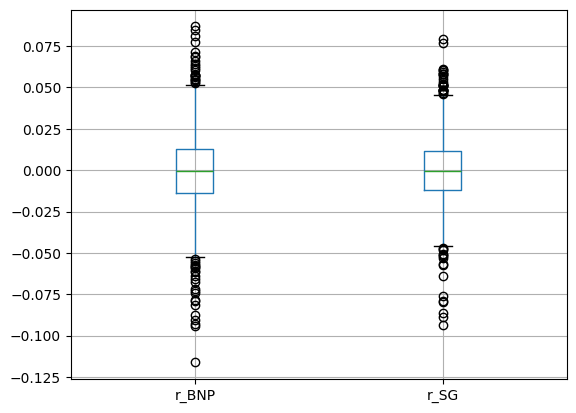

In [11]:
df[["r_BNP", "r_SG"]].boxplot()


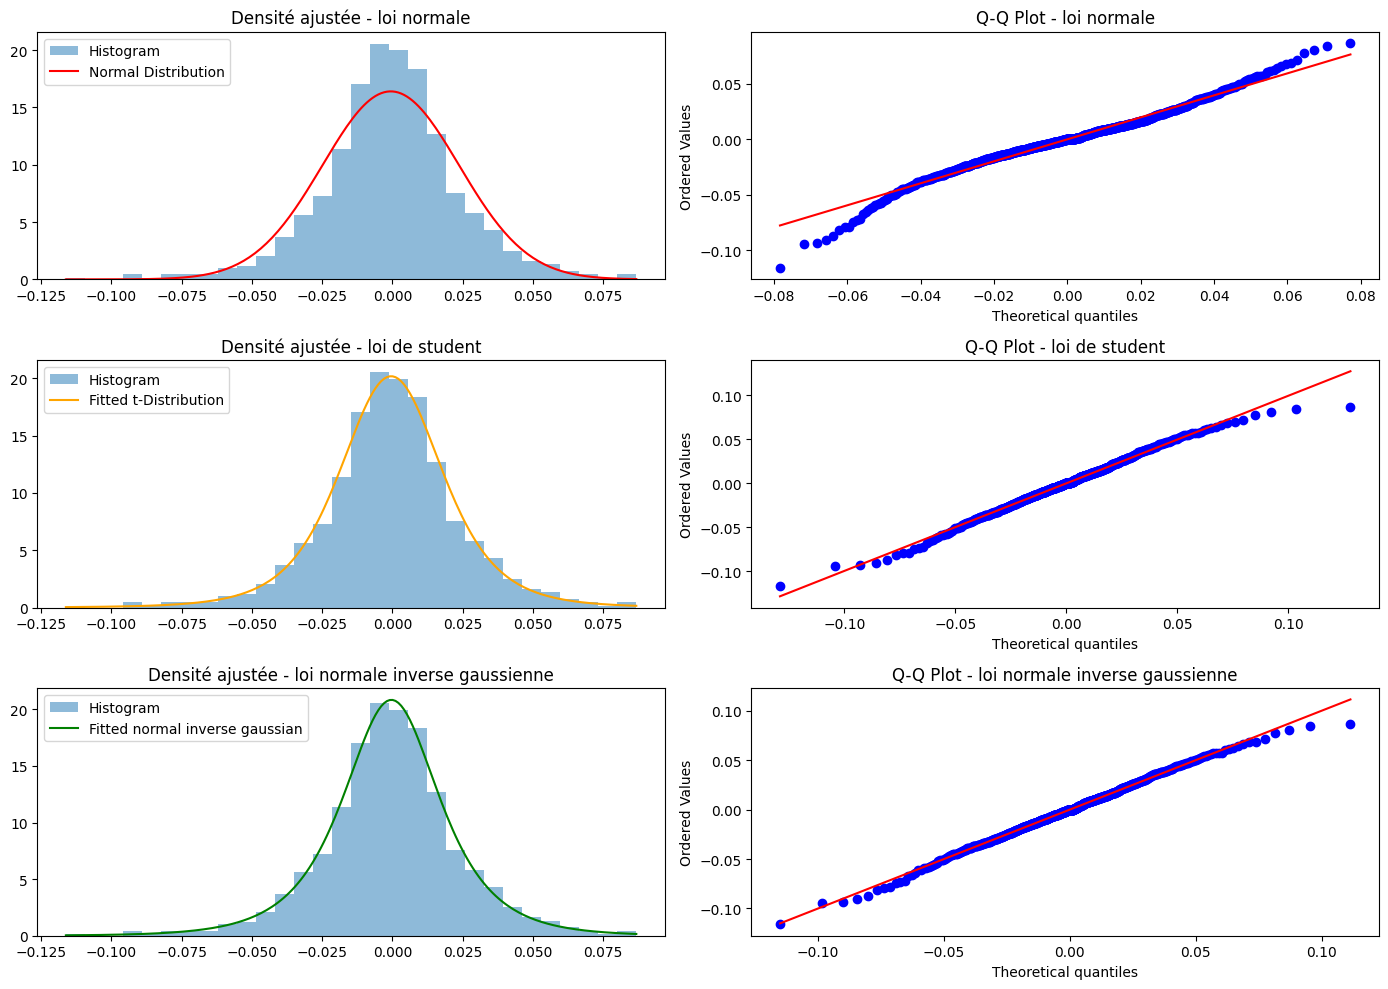

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Simulation de données pour l'exemple (remplace par tes données réelles)
data = df["r_BNP"].dropna().values

# Création de la figure et des axes pour 4 subplots (2 lignes, 2 colonnes)
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

######################## Loi normale ########################
params_norm = stats.norm.fit(data)

# Histogramme avec densité théorique de la loi normale (subplot 0,0)
xs = np.linspace(np.min(data), np.max(data), 200)
axs[0, 0].hist(data, bins=30, density=True, alpha=0.5, label="Histogram")
axs[0, 0].plot(xs, stats.norm.pdf(xs, *params_norm), label='Normal Distribution', color='red')
axs[0, 0].set_title('Densité ajustée - loi normale')
axs[0, 0].legend(loc='upper left')

# Q-Q plot (subplot 0,1)
stats.probplot(data, dist="norm",sparams=(params_norm), plot=axs[0, 1])
axs[0, 1].set_title('Q-Q Plot - loi normale')

######################## Loi de student ########################

# Estimation des paramètres de la distribution de Student pour vos données.
params_std= stats.t.fit(data)

# Histogramme avec densité théorique de la loi de Student.
xs = np.linspace(np.min(data), np.max(data), 200)
axs[1, 0].hist(data, bins=30, density=True, alpha=0.5, label="Histogram")
axs[1, 0].plot(xs, stats.t.pdf(xs, *params_std), label='Fitted t-Distribution',color='orange')
axs[1, 0].set_title('Densité ajustée - loi de student')
axs[1, 0].legend(loc='upper left')

# Q-Q plot avec une loi de Student.
stats.probplot(data, dist="t", sparams=(params_std), plot=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot - loi de student')

######################## Loi de Normal Inverse Gaussian ########################
params_nig = stats.norminvgauss.fit(data)

axs[2, 0].hist(data, bins=30, density=True, alpha=0.5, label="Histogram")
axs[2, 0].plot(xs, stats.norminvgauss.pdf(xs, *params_nig), label='Fitted normal inverse gaussian',color='green')
axs[2, 0].set_title('Densité ajustée - loi normale inverse gaussienne')
axs[2, 0].legend(loc='upper left')

# Q-Q plot avec une loi de NIG.
stats.probplot(data, dist="norminvgauss", sparams=(params_nig), plot=axs[2, 1])
axs[2, 1].set_title('Q-Q Plot - loi normale inverse gaussienne')

plt.tight_layout()

# Affichage des graphiques
plt.show()

U = pd.DataFrame(index=df.index, columns=df.columns)

U['BNP'] = stats.norminvgauss.cdf(data,*params_nig)


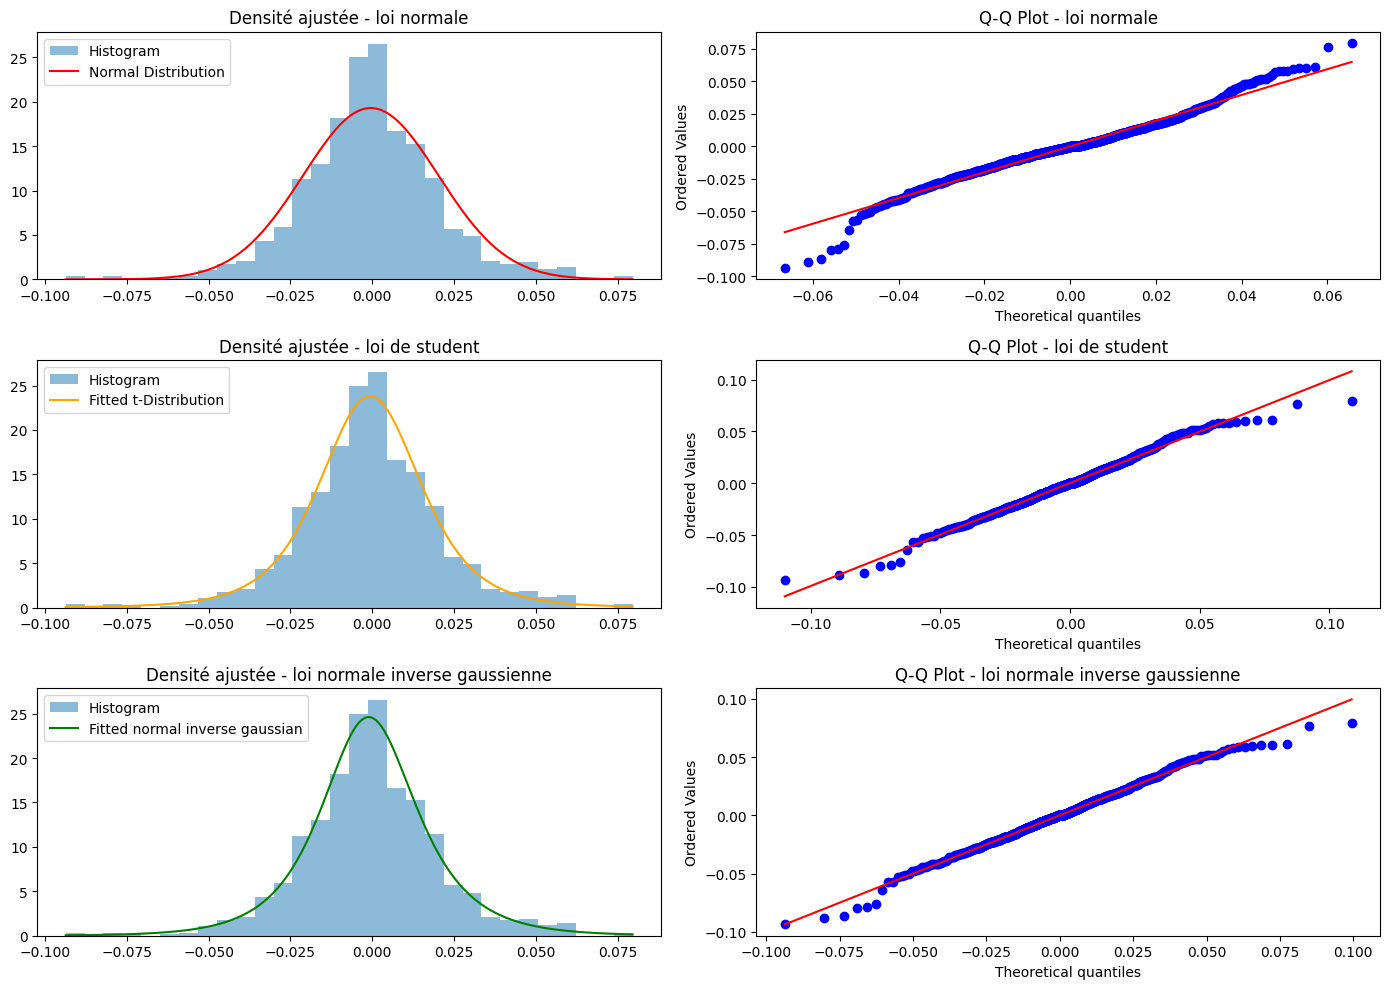

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Simulation de données pour l'exemple (remplace par tes données réelles)
data = df["r_SG"].dropna().values

# Création de la figure et des axes pour 4 subplots (2 lignes, 2 colonnes)
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

######################## Loi normale ########################
params_norm = stats.norm.fit(data)

# Histogramme avec densité théorique de la loi normale (subplot 0,0)
xs = np.linspace(np.min(data), np.max(data), 200)
axs[0, 0].hist(data, bins=30, density=True, alpha=0.5, label="Histogram")
axs[0, 0].plot(xs, stats.norm.pdf(xs, *params_norm), label='Normal Distribution', color='red')
axs[0, 0].set_title('Densité ajustée - loi normale')
axs[0, 0].legend(loc='upper left')

# Q-Q plot (subplot 0,1)
stats.probplot(data, dist="norm",sparams=(params_norm), plot=axs[0, 1])
axs[0, 1].set_title('Q-Q Plot - loi normale')

######################## Loi de student ########################

# Estimation des paramètres de la distribution de Student pour vos données.
params_std= stats.t.fit(data)

# Histogramme avec densité théorique de la loi de Student.
xs = np.linspace(np.min(data), np.max(data), 200)
axs[1, 0].hist(data, bins=30, density=True, alpha=0.5, label="Histogram")
axs[1, 0].plot(xs, stats.t.pdf(xs, *params_std), label='Fitted t-Distribution',color='orange')
axs[1, 0].set_title('Densité ajustée - loi de student')
axs[1, 0].legend(loc='upper left')

# Q-Q plot avec une loi de Student.
stats.probplot(data, dist="t", sparams=(params_std), plot=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot - loi de student')

######################## Loi de Normal Inverse Gaussian ########################
params_nig = stats.norminvgauss.fit(data)

axs[2, 0].hist(data, bins=30, density=True, alpha=0.5, label="Histogram")
axs[2, 0].plot(xs, stats.norminvgauss.pdf(xs, *params_nig), label='Fitted normal inverse gaussian',color='green')
axs[2, 0].set_title('Densité ajustée - loi normale inverse gaussienne')
axs[2, 0].legend(loc='upper left')

# Q-Q plot avec une loi de NIG.
stats.probplot(data, dist="norminvgauss", sparams=(params_nig), plot=axs[2, 1])
axs[2, 1].set_title('Q-Q Plot - loi normale inverse gaussienne')

plt.tight_layout()

# Affichage des graphiques
plt.show()

U = pd.DataFrame(index=df.index, columns=df.columns)

U['SG'] = stats.norminvgauss.cdf(data,*params_nig)
